<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

# Importing files

In [0]:
#importing files
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading Dataset

In [0]:
car = pd.read_csv('autolib_dataset_moringa_w4.csv')


In [0]:
#Getting the dataset information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14421829 entries, 0 to 14421828
Data columns (total 26 columns):
Unnamed: 0             int64
Address                object
Cars                   int64
Bluecar counter        int64
Utilib counter         int64
Utilib 1.4 counter     int64
Charge Slots           int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code            int64
Public name            object
Rental status          object
Scheduled at           object
Slots                  int64
Station type           object
Status                 object
Subscription status    object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtypes: int64(13), object(13)
memory usage: 2.8+ GB


# Cleaning Dataset

##*Validity*

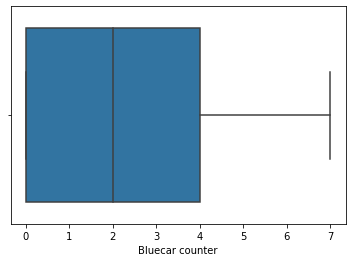

In [0]:
#Boxplot Bluecar counter
bplot1= sns.boxplot(x=car['Bluecar counter'])

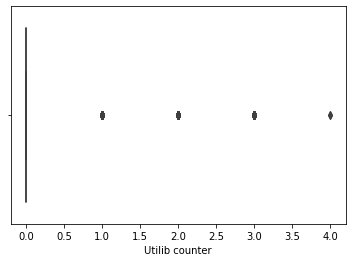

In [0]:
#Boxplot  on Utilib counter
bplot2= sns.boxplot(x=car['Utilib counter'])

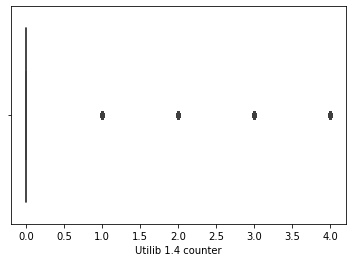

In [0]:
#boxplot on Utilib counter 1.4
bplot3= sns.boxplot(x=car['Utilib 1.4 counter'])

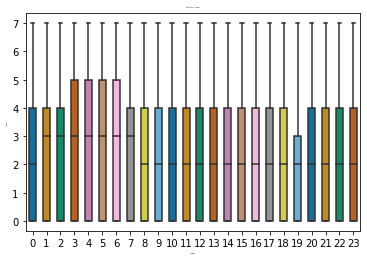

<Figure size 720x720 with 0 Axes>

In [0]:

bplot2= sns.boxplot(x=car['hour'],y=car['Bluecar counter'],palette='colorblind',width=0.5)
plt.figure(figsize =(10,10))
bplot2.axes.set_title("Cars per Hour",fontsize=2)
bplot2.set_xlabel("Hour",fontsize=2)
bplot2.set_ylabel("Cars",fontsize=2)
plt.show()


In [0]:
#finding outliers using interquantile range
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3-Q1

outliers= car[((car < (Q1 - 1.5*IQR)) | (car > (Q3 + 1.5*IQR))).any(axis=1)]
outliers.head()


,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,...,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,...,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,...,NaN,2,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,...,NaN,4,station,ok,nonexistent,2018,4,1,0,0
5,5,44 Rue des Pirogues de Bercy,1,1,0,0,2,operational,Paris,NaN,...,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [0]:
outliers.shape

(4895084, 26)

In [0]:
non_outliers= car[~((car < (Q1 - 1.5*IQR)) | (car > (Q3 + 1.5*IQR))).any(axis=1)]
non_outliers.head()


,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,...,NaN,1,station,ok,nonexistent,2018,4,1,0,0
8,8,10 Avenue du Docteur Arnold Netter,4,4,0,0,0,operational,Paris,NaN,...,NaN,0,station,ok,nonexistent,2018,4,1,0,0
10,10,2 Rue Houdart de Lamotte,3,3,0,0,0,nonexistent,Paris,NaN,...,NaN,1,station,ok,nonexistent,2018,4,1,0,0
11,11,238 Rue du Faubourg Saint-Antoine,2,2,0,0,0,operational,Paris,NaN,...,NaN,2,station,ok,nonexistent,2018,4,1,0,0
19,19,99 Rue Monge,1,1,0,0,0,operational,Paris,NaN,...,NaN,2,station,ok,nonexistent,2018,4,1,0,0


In [0]:
non_outliers.shape

(9526745, 26)

In [0]:
car.columns.values

array(['Unnamed: 0', 'Address', 'Cars', 'Bluecar counter',
       'Utilib counter', 'Utilib 1.4 counter', 'Charge Slots',
       'Charging Status', 'City', 'Displayed comment', 'ID', 'Kind',
       'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Scheduled at', 'Slots', 'Station type', 'Status',
       'Subscription status', 'year', 'month', 'day', 'hour', 'minute'],
      dtype=object)

In [0]:
#droping displayed column because its irrelevant
car.drop(["Displayed comment"],axis=1,inplace=True)

In [0]:
#droping Unnamed: 0 column because that index is not necessary
car.drop("Unnamed: 0",axis=1,inplace=True)

In [0]:
car.columns.values

array(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'ID', 'Kind', 'Geo point', 'Postal code', 'Public name',
       'Rental status', 'Scheduled at', 'Slots', 'Station type', 'Status',
       'Subscription status', 'year', 'month', 'day', 'hour', 'minute'],
      dtype=object)

## *Accuracy*

In [0]:
#confirming whether it is actually true that its true blue car is equal to car
car[ ~(car['Cars'] == car['Bluecar counter'])]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


In [0]:
car.drop('Cars',axis=1,inplace=True)

In [0]:
car.columns.values

array(['Address', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'ID', 'Kind', 'Geo point', 'Postal code', 'Public name',
       'Rental status', 'Scheduled at', 'Slots', 'Station type', 'Status',
       'Subscription status', 'year', 'month', 'day', 'hour', 'minute'],
      dtype=object)

##*Completeness* 

In [0]:
#checking for null values
car.isnull().sum()

Address                       0
Bluecar counter               0
Utilib counter                0
Utilib 1.4 counter            0
Charge Slots                  0
Charging Status               0
City                          0
ID                            0
Kind                          0
Geo point                     0
Postal code                   0
Public name                   0
Rental status                 0
Scheduled at           14310213
Slots                         0
Station type                  0
Status                        0
Subscription status           0
year                          0
month                         0
day                           0
hour                          0
minute                        0
dtype: int64

In [0]:
# we fill the scheduled at with zero
car['Scheduled at'].fillna(0,inplace=True)

In [0]:
#checking whether the null values are filled
car.isnull().sum()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Scheduled at           0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

##*Consistency*

In [0]:
#confirming whether the are duplicates
car[car.duplicated()]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1119,43 Rue de Monceau,0,0,0,2,operational,Paris,paris-monceau-43,STATION,"48.8778333, 2.310832",...,0,6,station,ok,nonexistent,2018,4,1,0,0
1120,330 rue des PyrÃ©nÃ©es,2,0,0,1,operational,Paris,paris-pyrenees-330,SPACE,"48.8732135, 2.3903853",...,0,3,full_station,ok,operational,2018,4,1,0,0
1121,28 Avenue de la Porte de Villiers,2,0,0,1,operational,Paris,paris-portedevilliers-28,STATION,"48.8854246, 2.2849721",...,0,4,station,ok,nonexistent,2018,4,1,0,0
1122,97 Rue de Charenton,1,0,0,0,operational,Paris,paris-charenton-97,STATION,"48.8476733, 2.377312",...,0,2,station,ok,nonexistent,2018,4,1,0,0
1123,17 boulevard Saint-Martin,2,0,0,0,nonexistent,Paris,paris-saintmartin-17,STATION,"48.8681421, 2.360276",...,0,1,station,ok,nonexistent,2018,4,1,0,0
1124,1 rue du PrÃ© Saint Gervais,0,0,0,0,nonexistent,Pantin,pantin-presaintgervais-1,SPACE,"48.890711, 2.4030061",...,0,0,full_station,closed,nonexistent,2018,4,1,0,0
1125,118 rue Houdan,5,0,0,0,operational,Sceaux,sceaux-houdan-118,STATION,"48.779037, 2.2891934",...,0,0,station,ok,nonexistent,2018,4,1,0,0
1126,1 rue des Nonnains d'HyÃ¨res,0,0,0,1,operational,Paris,paris-nonnainsdhyeres-1,STATION,"48.85378, 2.358089",...,0,5,station,ok,nonexistent,2018,4,1,0,0
1127,55 avenue de SÃ©gur,0,0,0,2,operational,Paris,paris-segur-55,STATION,"48.8492973, 2.3077697",...,0,6,station,ok,nonexistent,2018,4,1,0,0
1128,12 Rue Francis de PressensÃ©,3,0,1,0,nonexistent,Puteaux,puteaux-francisdepressense-12,STATION,"48.8761876, 2.2361346",...,0,0,station,ok,nonexistent,2018,4,1,0,0


In [0]:
#This is to drop duplicates
car.drop_duplicates(keep=False,inplace=True)

In [0]:
#This is the evidence
car.shape

(14136049, 23)

## *Uniformity*

In [0]:
#Renaming the columns ,removing spaces ,converting to lower,replacing spaces with underscore
car.columns = car.columns.str.strip().str.lower().str.replace(' ', '_')

In [0]:
car.columns

Index(['address', 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'charge_slots', 'charging_status', 'city', 'id', 'kind', 'geo_point',
       'postal_code', 'public_name', 'rental_status', 'scheduled_at', 'slots',
       'station_type', 'status', 'subscription_status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [0]:
#converting data types date and time
car['date'] = car.apply(lambda row: dt.datetime(row['year'], row['month'], row['day'], row['hour'], row['minute']), axis=1)

In [0]:
car['date']

0          2018-04-01 00:00:00
1          2018-04-01 00:00:00
2          2018-04-01 00:00:00
3          2018-04-01 00:00:00
4          2018-04-01 00:00:00
5          2018-04-01 00:00:00
6          2018-04-01 00:00:00
8          2018-04-01 00:00:00
9          2018-04-01 00:00:00
10         2018-04-01 00:00:00
11         2018-04-01 00:00:00
12         2018-04-01 00:00:00
13         2018-04-01 00:00:00
14         2018-04-01 00:00:00
15         2018-04-01 00:00:00
16         2018-04-01 00:00:00
17         2018-04-01 00:00:00
18         2018-04-01 00:00:00
19         2018-04-01 00:00:00
20         2018-04-01 00:00:00
21         2018-04-01 00:00:00
22         2018-04-01 00:00:00
23         2018-04-01 00:00:00
24         2018-04-01 00:00:00
25         2018-04-01 00:00:00
26         2018-04-01 00:00:00
27         2018-04-01 00:00:00
28         2018-04-01 00:00:00
29         2018-04-01 00:00:00
30         2018-04-01 00:00:00
                   ...        
14421785   2018-04-09 23:59:00
14421786

## Adding Relevant columns

In [0]:
#creating a new bluecar_counter with differences inoerder to
car['bluecar_counter_diff']=car.bluecar_counter.diff()

In [0]:
#creating a new utilib_counter with differences inoerder to
car['utilib_counter_diff']=car.utilib_counter.diff()

In [0]:
#creating a new utilib_1.4_counter with differences inoerder to
car['utilib_1.4_counter_diff']=car['utilib_1.4_counter'].diff()

# Answeing Objective questions

In [0]:
car.columns

Index(['address', 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'charge_slots', 'charging_status', 'city', 'id', 'kind', 'geo_point',
       'postal_code', 'public_name', 'rental_status', 'scheduled_at', 'slots',
       'station_type', 'status', 'subscription_status', 'year', 'month', 'day',
       'hour', 'minute', 'date', 'bluecar_counter_diff', 'utilib_counter_diff',
       'utilib_1.4_counter_diff'],
      dtype='object')

## Question 1

In [0]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
car[(car['city']=='Paris') & (car['bluecar_counter_diff'] < 0)].groupby(car.date.dt.hour)['bluecar_counter_diff'].count().sort_values(ascending= False).head(2)


date
4    146713
3    146595
Name: bluecar_counter_diff, dtype: int64

In [0]:
car[(car['city']=='Paris') & (car['utilib_counter_diff'] < 0)].groupby(car.date.dt.hour)['utilib_counter_diff'].count().sort_values(ascending= False).head(2)


date
5    19406
7    19177
Name: utilib_counter_diff, dtype: int64

In [0]:
car[(car['city']=='Paris') & (car['utilib_1.4_counter_diff'] < 0)].groupby(car.date.dt.hour)['utilib_1.4_counter_diff'].count().sort_values(ascending= False).head(2)


date
6    35850
5    35383
Name: utilib_1.4_counter_diff, dtype: int64

## Question2

In [0]:
#What is the most popular hour for returning cars?
car[(car['bluecar_counter_diff'] > 0)].groupby(car.date.dt.hour)['bluecar_counter_diff'].sum().sort_values(ascending= False).head(2)


date
4    708001.0
5    705399.0
Name: bluecar_counter_diff, dtype: float64

In [0]:
car[(car['utilib_counter_diff'] > 0)].groupby(car.date.dt.hour)['utilib_counter_diff'].sum().sort_values(ascending= False).head(2)


date
5    40112.0
6    40100.0
Name: utilib_counter_diff, dtype: float64

In [0]:
car[(car['utilib_1.4_counter_diff'] > 0)].groupby(car.date.dt.hour)['utilib_1.4_counter_diff'].sum().sort_values(ascending= False).head(2)


date
4    78138.0
5    78076.0
Name: utilib_1.4_counter_diff, dtype: float64

##Question 3

In [0]:
#What station is the most popular for picking?
car[(car['bluecar_counter_diff'] < 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Malakoff/Charles de Gaulle/Parking    9054
Paris/Halles/3                        9029
Name: public_name, dtype: int64

In [0]:
car[(car['utilib_counter_diff'] < 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Boulogne-Billancourt/Gallieni/114    1693
Paris/Lobau/Parking                  1649
Name: public_name, dtype: int64

In [0]:
car[(car['utilib_1.4_counter_diff'] < 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Malakoff/Charles de Gaulle/Parking    2153
Alfortville/Malleret/16               2111
Name: public_name, dtype: int64

In [0]:
#What station is the most popular for returning?
car[(car['bluecar_counter_diff'] > 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Colombes/MarÃ©chal Joffre/30    9734
AsniÃ¨res-sur-Seine/Bas/6       9589
Name: public_name, dtype: int64

In [0]:
car[(car['utilib_counter_diff'] > 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Sceaux/Gare/3           2996
Nanterre/Gambetta/20    2989
Name: public_name, dtype: int64

In [0]:
car[(car['utilib_1.4_counter_diff'] > 0)& (car['status']=='ok')&(car['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False).head(2)


public_name
Fontenay-Sous-Bois/Rabelais/12    4851
Nanterre/Gambetta/20              4636
Name: public_name, dtype: int64

##Question 4

In [0]:
#What postal code is the most popular for picking up Bluecars? 
car[car['bluecar_counter_diff'] < 0].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    284361
Name: postal_code, dtype: int64

In [0]:
car[car['utilib_counter_diff'] < 0].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    44526
Name: postal_code, dtype: int64

In [0]:
car[car['utilib_1.4_counter_diff'] < 0].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    72308
Name: postal_code, dtype: int64

##Question 5

In [0]:
#Does the most popular station belong to that postal code?
car[(car['public_name']=='Colombes/MarÃ©chal Joffre/30') & (car['postal_code']==75015)]

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,...,subscription_status,year,month,day,hour,minute,date,bluecar_counter_diff,utilib_counter_diff,utilib_1.4_counter_diff


In [0]:
car[(car['public_name']=='Sceaux/Gare/3') & (car['postal_code']==75015)]

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,...,subscription_status,year,month,day,hour,minute,date,bluecar_counter_diff,utilib_counter_diff,utilib_1.4_counter_diff


In [0]:
car[(car['public_name']=='Fontenay-Sous-Bois/Rabelais/12') & (car['postal_code']==75015)]

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,...,subscription_status,year,month,day,hour,minute,date,bluecar_counter_diff,utilib_counter_diff,utilib_1.4_counter_diff
